In [3]:
import pandas as pd

In [4]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")

In [5]:
dataframe.head()

,time,latitude,longitude,altitude,timelocal,temperature,pressure,humidity,voc,noise,co2,ch2o,o3,pm1,pm25,pm10,readable time,day
0,1651363204,45.651464,25.615426,538,914160,6.73,95569,76,215841,43,599,7,20,7,9,10,01-05-22 00:00,01-05-22
1,1651363264,45.651464,25.615426,538,914220,6.71,95569,76,213691,50,601,7,20,7,9,10,01-05-22 00:01,01-05-22
2,1651363324,45.651464,25.615426,538,914280,6.70,95570,76,211822,43,601,7,20,7,9,10,01-05-22 00:02,01-05-22
3,1651363384,45.651464,25.615426,538,914340,6.69,95568,76,206437,42,600,7,20,7,9,10,01-05-22 00:03,01-05-22
4,1651363444,45.651464,25.615426,538,914400,6.67,95568,77,206428,45,602,7,20,7,9,10,01-05-22 00:04,01-05-22


In [6]:
dataframe_size = len(dataframe.index)
dataframe_size

44516

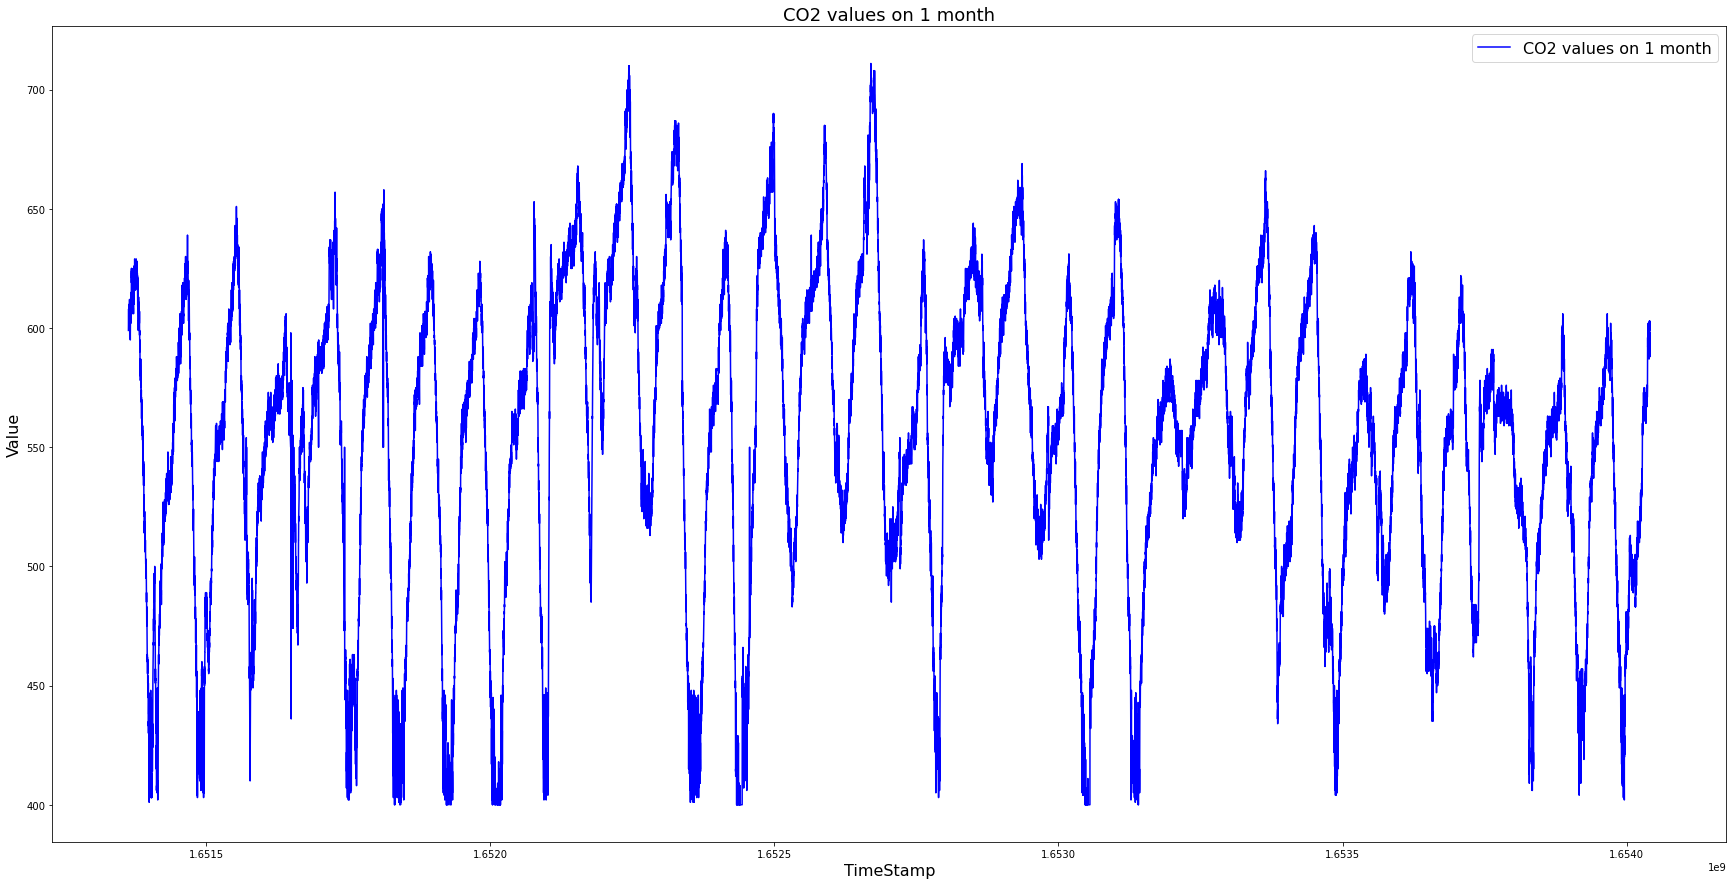

In [7]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(30,15))
# plt.plot(dataframe.get('time'), dataframe.get('pm10'), label="PM10 values on 1 month", color = "blue")
plt.plot(dataframe.get('time'), dataframe.get('co2'), label="CO2 values on 1 month", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("PM10 values on 1 month", fontsize=18)
plt.title("CO2 values on 1 month", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month.jpg', bbox_inches = 'tight')
plt.show()

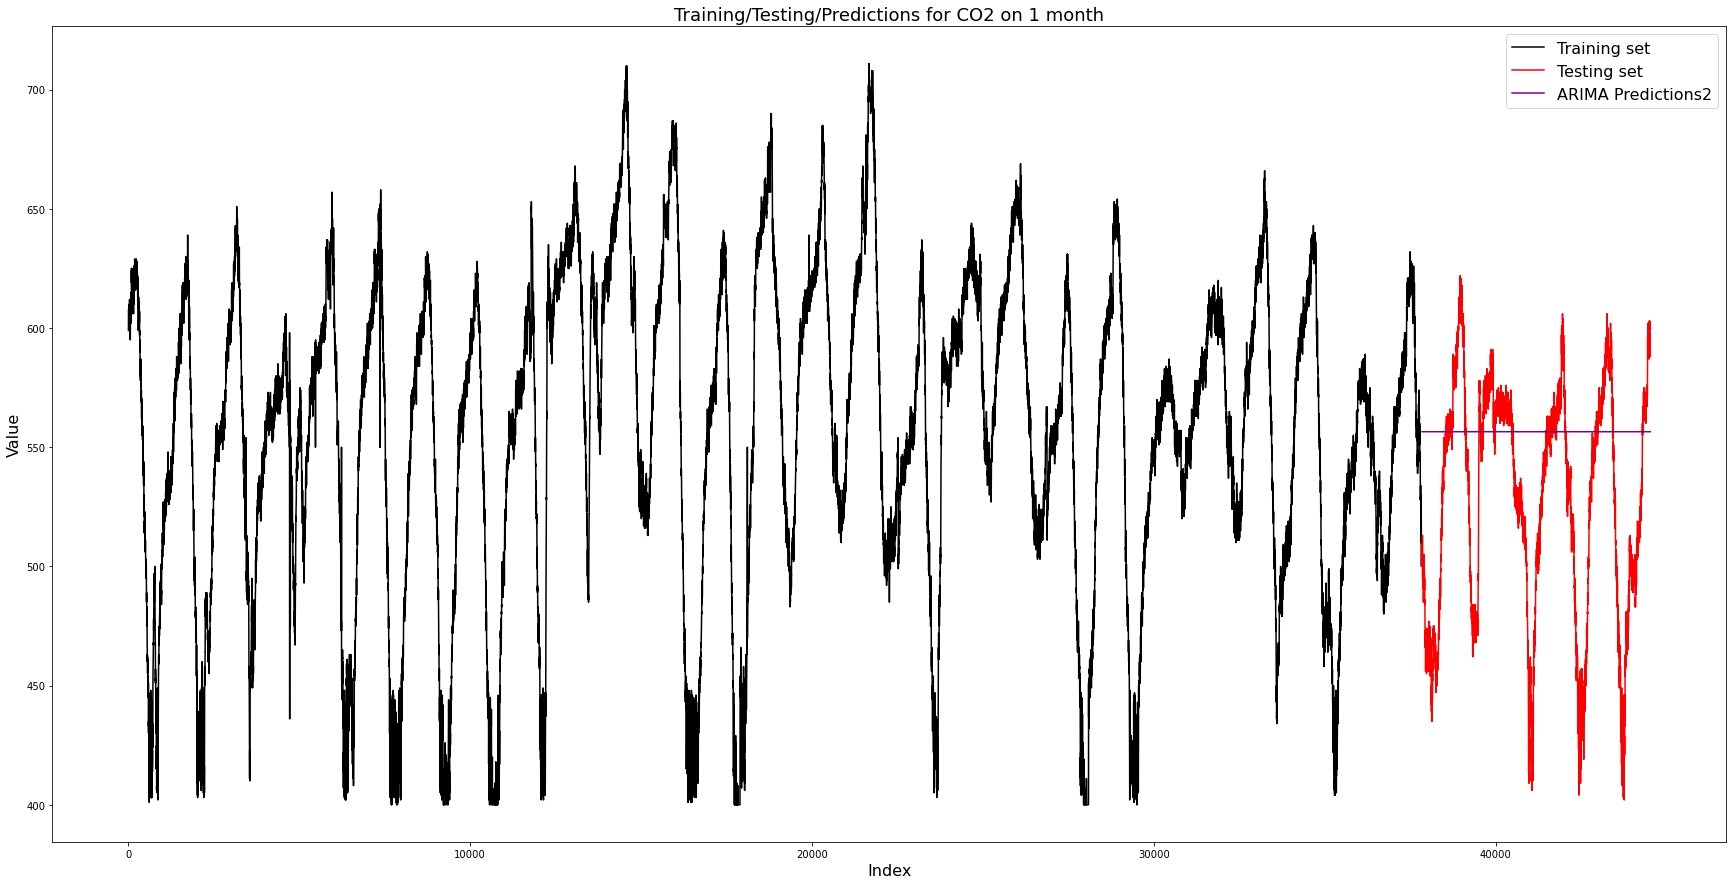

RMSE:  56.554924808792016


In [14]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]
# train = dataframe[dataframe.index < dataframe_size*(3/4)]
# test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# y = train['pm10']
y = train['co2']

ARMAmodel = ARIMA(y, order=(0,0,0))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.title("Training/Testing/Predictions for CO2 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA2', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

# arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
arima_rmse2 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

c:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


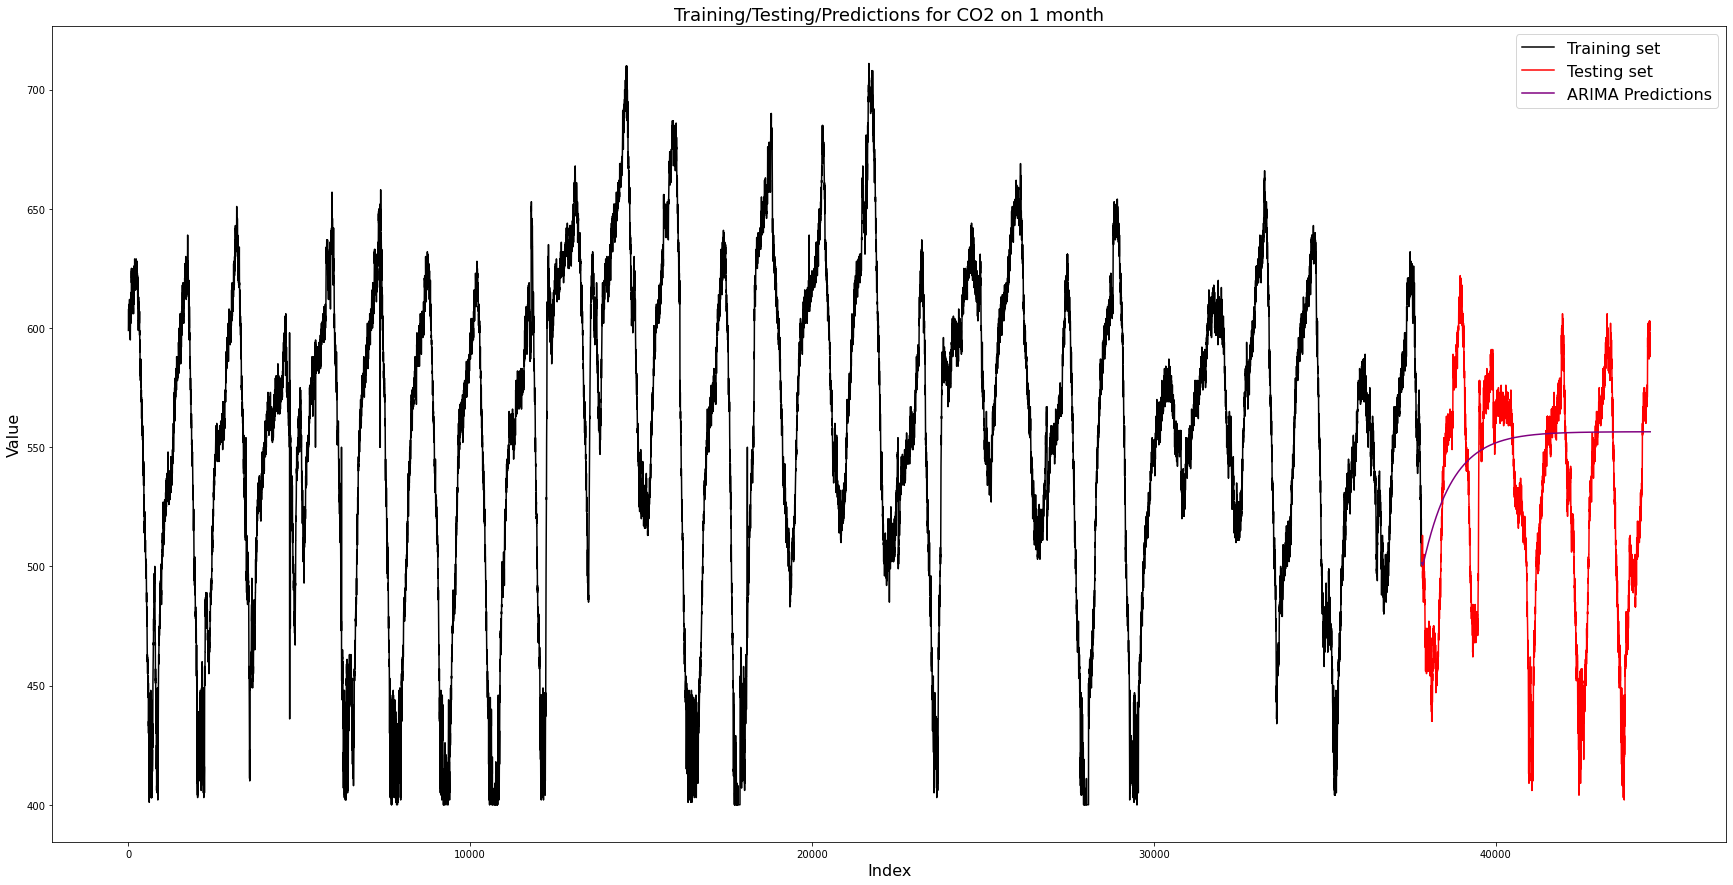

RMSE:  52.687074890921885


In [13]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]
# train = dataframe[dataframe.index < dataframe_size*(3/4)]
# test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# y = train['pm10']
y = train['co2']

ARMAmodel = ARIMA(y, order=(31,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.title("Training/Testing/Predictions for CO2 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

# arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
arima_rmse = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


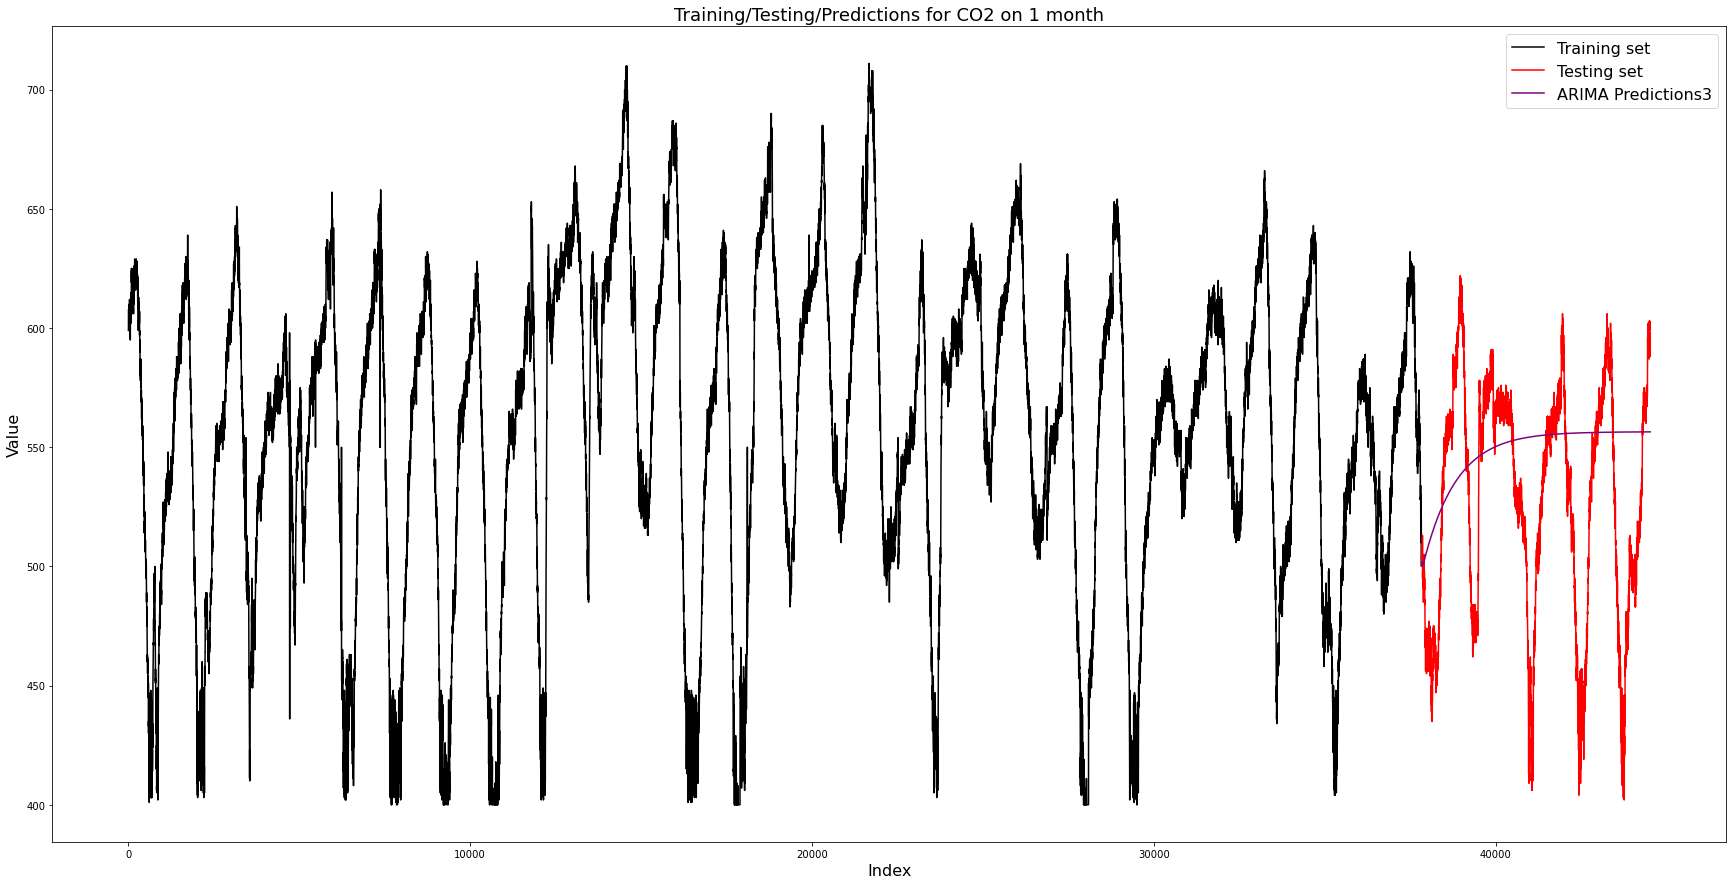

RMSE:  52.59819965387563


In [15]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]
# train = dataframe[dataframe.index < dataframe_size*(3/4)]
# test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# y = train['pm10']
y = train['co2']

ARMAmodel = ARIMA(y, order=(31,0,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.title("Training/Testing/Predictions for CO2 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA3', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

# arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
arima_rmse = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

In [10]:
y

0        599
1        601
2        601
3        600
4        602
        ... 
37834    501
37835    500
37836    501
37837    503
37838    502
Name: co2, Length: 37839, dtype: int64

In [11]:
y_pred_df

,lower co2,upper co2,Predictions
37839,426.420086,686.574542,556.497314
37840,426.420086,686.574542,556.497314
37841,426.420086,686.574542,556.497314
37842,426.420086,686.574542,556.497314
37843,426.420086,686.574542,556.497314
...,...,...,...
44511,426.420086,686.574542,556.497314
44512,426.420086,686.574542,556.497314
44513,426.420086,686.574542,556.497314
44514,426.420086,686.574542,556.497314


In [12]:
y_pred_out

37839    556.497314
37840    556.497314
37841    556.497314
37842    556.497314
37843    556.497314
            ...    
44511    556.497314
44512    556.497314
44513    556.497314
44514    556.497314
44515    556.497314
Name: Predictions, Length: 6677, dtype: float64